all

shape of s: (10000, 2)


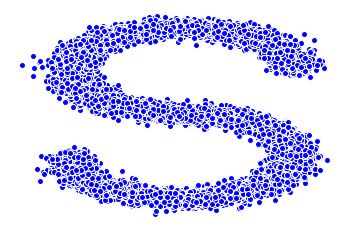

all the same shape torch.Size([100])
Training model...
tensor(0.6125, grad_fn=<MeanBackward0>)
tensor(0.4133, grad_fn=<MeanBackward0>)


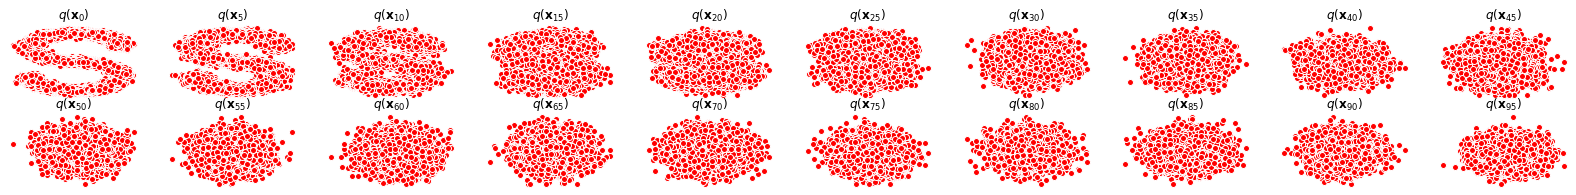

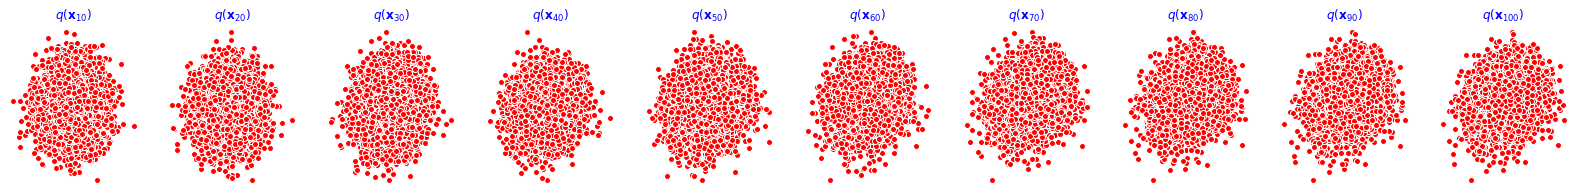

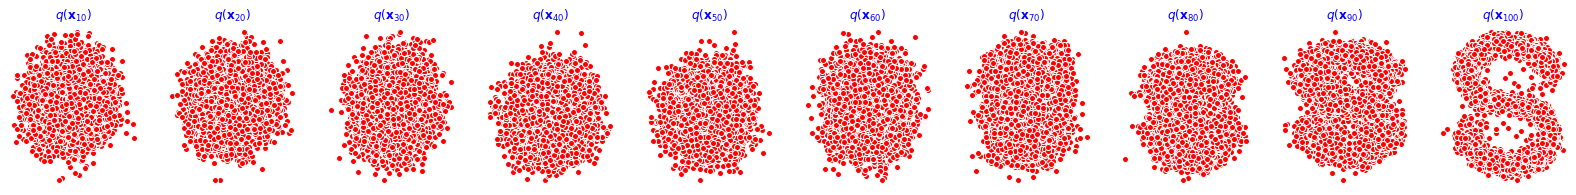

In [1]:
#diffusion_model_test_1.py
#ÁõÆÊ®ô
#1.ÂÖàÂà©Áî®s_curveÂÖàÁîüÊàê‰∏ÄÂÄã‰∏âÁ∂≠s
#2.ËΩâÊèõÊàê‰∫åÁ∂≠‰∏¶Áï´Âá∫Âπ≥Èù¢ÁöÑs
#3.ËΩâÊèõÊàê‰∫åÁ∂≠ÂºµÈáè

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D 
import torch

s_curve,_ = make_s_curve(10**4,noise=0.1) # ÁîüÊàê10000ÂÄãÈªûÁöÑSÊõ≤Á∑öÔºåÂô™ËÅ≤Âº∑Â∫¶0.1
s_curve = s_curve[:,[0,2]]/10.0 #Âè™ÂèñÁ¨¨1Ë∑üÁ¨¨3Á∂≠Â∫¶Ôºå‰∏¶Èô§‰ª•10(/10)Ë™øÊï¥ÊØî‰æãÊñπ‰æøÈñ±ËÆÄ

print("shape of s:",np.shape(s_curve)) #Âç∞Âá∫Êï∏Êìös_curveÁöÑÂΩ¢ÁãÄ (Âè™Êúâ‰∫åÁ∂≠Ôºå10000ÂÄãÈªû) (10000,2)

data = s_curve.T #.T ÊòØNumpyÁöÑËΩâÁΩÆÊìç‰ΩúÂ∞áË°åËÆäÊàêÂàóÔºåÂàóËÆäÊàêË°å„ÄÇ
#EX:ÂéüÊú¨ s_curve ÊòØ‰∏ÄÂÄã (10000, 3) ÁöÑÁü©Èô£ÔºåËΩâÁΩÆÂæåËÆäÊàê (3, 10000)ÔºåÁî®ÊÑèÊòØÊØè‰∏ÄÂàó‰ª£Ë°® X„ÄÅY Âíå Z Ëª∏ÁöÑÂùêÊ®ôÔºåÊñπ‰æøÂú®ÂæåÁ∫åÁöÑÁπ™ÂúñÊìç‰Ωú‰∏≠‰ΩøÁî®„ÄÇ
#(2,10000)

fig,ax = plt.subplots() #plt.subplots()ÊòØmatplotlibÁöÑÂáΩÊï∏ Ë®≠ÂÆöÊäìÂá∫Êï¥ÂÄãÂúñÂΩ¢(fig)Ë∑üÂ≠êÂúñÂΩ¢(ax)‰æÜË®≠ÂÆö

ax.scatter(*data,color='blue',edgecolor='white'); #*dataÊòØ‰∏ÄÁ®ÆÊòØÂ∞áÂèÉÊï∏ÂàÜÈõ¢ÁöÑË™ûÊ≥ïÔºåËΩâÁΩÆÈÅéÁöÑdataË®≠ÂÆöÊï∏ÊìöÈªûÈ°èËâ≤ËóçËâ≤ÔºåÈÇäÁ∑£ÁôΩÁöÑ
#scatterÂèØ‰ª•Áπ™Ë£ΩÊï£ÈªûÂúñ

ax.axis('off')#Èö±ËóèÂùêÊ®ôËª∏

dataset = torch.Tensor(s_curve).float()#Êääs_curveËÆäÊàêÂºµÈáèÔºåË≥áÊñôÂûãÂà•float ‰∫åÁ∂≠ÂºµÈáè Áî®ÊñºÂæåÁ∫åÊìç‰Ωú
'''
Ê®ôÈáèÔºà0Á∂≠ÂºµÈáèÔºâÔºö
ÂÉÖÊúâ‰∏ÄÂÄãÊï∏ÂÄºÔºå‰æãÂ¶Ç 5 Êàñ 3.14„ÄÇÈÄôÊòØÊúÄÂü∫Êú¨ÁöÑÂºµÈáè„ÄÇ

ÂêëÈáèÔºà1Á∂≠ÂºµÈáèÔºâÔºö
Áî±‰∏ÄÁµÑÊï∏ÂÄºÁµÑÊàêÁöÑÂàóË°®Ôºå‰æãÂ¶Ç [1, 2, 3]„ÄÇÈÄôÂèØ‰ª•Ë°®Á§∫‰∏ÄÂÄã‰∏ÄÁ∂≠ÁöÑÊï∏ÊìöÈõÜÂêà„ÄÇ

Áü©Èô£Ôºà2Á∂≠ÂºµÈáèÔºâÔºö
Áî±Â§öÂÄãÂêëÈáèÁµÑÊàêÁöÑË°®Ê†ºÔºàÊï∏ÊìöÁµêÊßãÔºâÔºå‰æãÂ¶ÇÔºö
[[1, 2, 3],
 [4, 5, 6]]
ÈÄôË°®Á§∫‰∏ÄÂÄãÂåÖÂê´ÂÖ©Ë°å‰∏âÂàóÁöÑÊï∏ÊìöÁµêÊßã„ÄÇ

È´òÁ∂≠ÂºµÈáèÔºà3Á∂≠Âèä‰ª•‰∏äÔºâÔºö
Áï∂Êï∏ÊìöÁöÑÁ∂≠Â∫¶Â§ßÊñº 2 ÊôÇÔºåÂèØ‰ª•‰ΩøÁî®ÂºµÈáè‰æÜË°®Á§∫Ôºå‰æãÂ¶ÇÔºö
3Á∂≠ÂºµÈáèÂèØ‰ª•ÊÉ≥ÂÉèÊàê‰∏ÄÂÄãÁ´ãÊñπÈ´îÔºà‰æãÂ¶ÇÔºåÂúñÁâáÁöÑ RGB Êï∏ÊìöÔºâ„ÄÇ
4Á∂≠ÂºµÈáèÂèØ‰ª•Áî®‰æÜË°®Á§∫‰∏ÄÊâπÂúñÁâáÔºà‰æãÂ¶ÇÔºåÊâπÈáèÁöÑÂúñÁâáÊï∏ÊìöÔºâ„ÄÇ
'''
plt.show() 

#È°ØÁ§∫ÂúñÂΩ¢

#diffusion_model_test_2.py
#ÁõÆÊ®ô
#1.Ë®≠ÁΩÆÂèÉÊï∏ÂèäÂàùÂßãÂåñ

num_steps = 100 #Ë®≠ÁΩÆÊ≠•Êï∏100

#Ë®≠ÂÆöŒ≤ÁöÑÂÄº
#Œ≤ ÊòØÊØè‰∏ÄÊ≠•Ê∑ªÂä†ÁöÑÂô™ËÅ≤Âº∑Â∫¶
betas = torch.linspace(-6,6,num_steps) #Êàë‰πü‰∏çÁü•ÈÅìÁÇ∫Âï•ÊòØ-6~6ÔºåÂ∞±Èö®Ê©üÂêëÈáèÂàÜÂ∏ÉËÄåÂ∑≤„ÑÖÔºåÁÑ∂ÂæåÊúâ100Ê≠•
betas = torch.sigmoid(betas)*(0.5e-2 - 1e-5)+1e-5 #ÊääBetas sigmoid(0~1)ÔºåÁÑ∂Âæå*(0.5e-2 - 1e-5)+1e-5 
#(0.5e-2 - 1e-5)Á¥ÑÁÇ∫0.04ÔºåÁî®ÊÑèÊòØÊääsigmoidÁöÑËº∏Âá∫ÊéßÂà∂ÂÜçÈÄôÂÄãÁØÑÂúç(0~0.04)ÔºåÁÑ∂ÂæåÂä†‰∏ÄÂÄãÂ∏∏Êï∏ÈÅøÂÖçÊúâ0

#Ë®≠ÂÆöŒ±ÁöÑÂÄº 
#Œ± ÂÄº‰ª£Ë°®ÁöÑÊòØÂú®ÊØè‰∏ÄÊ≠•‰∏≠‰øùÁïôÂéüÂßãÊï∏ÊìöÁöÑÈÉ®ÂàÜÔºåËÄå Œ≤ ÊòØÊ∑ªÂä†ÁöÑÂô™ËÅ≤Âº∑Â∫¶„ÄÇÂõ†Ê≠§ÔºåŒ± ÂèØ‰ª•Ë¶ñÁÇ∫Êï∏Êìö‰∏≠‰øùÁïôÁöÑÊàêÂàÜ
alphas = 1-betas
alphas_prod = torch.cumprod(alphas,0) #torch.cumprod ÂáΩÊï∏Ë®àÁÆóÊ≤øËëóÊåáÂÆöÁ∂≠Â∫¶ÁöÑÁ¥ØÁ©ç‰πòÁ©ç„ÄÇÈÄôÊÑèÂë≥ËëóÊØèÂÄãÊ≠•È©üÁöÑ Œ± ÂÄºÂ∞áËàá‰πãÂâçÊâÄÊúâÊ≠•È©üÁöÑ Œ± ÂÄºÁõ∏‰πòÔºå‰ª•ÂæóÂà∞Âà∞ÁõÆÂâçÁÇ∫Ê≠¢ÁöÑÁ∏Ω‰øùÁïôÊàêÂàÜ„ÄÇ
alphas_prod_p = torch.cat([torch.tensor([1]).float(),alphas_prod[:-1]],0) #ÂÜçalphas_prodÂºµÈáèÊúÄÂâçÈù¢ÊîæÁΩÆ‰∏ÄÂÄã1
'''
ex
Alphas: tensor([0.9999, 0.9998, 0.9995, 0.9991, 0.9985, 0.9985, 0.9991, 0.9995, 0.9998, 0.9999])
Alphas Product: tensor([0.9999, 0.9997(0.9999*0.9998), 0.9992, 0.9983, 0.9968, 0.9968, 0.9976, 0.9985, 0.9993, 0.9999])
Alphas Product P: tensor([1.0000, 0.9999, 0.9997, 0.9992, 0.9983, 0.9968, 0.9968, 0.9976, 0.9985, 0.9993])
'''

alphas_bar_sqrt = torch.sqrt(alphas_prod) #ÁÆóalphas_prodÁöÑÂπ≥ÊñπÊ†π
one_minus_alphas_bar_log = torch.log(1 - alphas_prod) #torchÁöÑlogÈªòË™çÊòØloge
one_minus_alphas_bar_sqrt = torch.sqrt(1 - alphas_prod)
#Êì¥Êï£Á®ãÂ∫¶ÁöÑÊåáÊ®ô?

assert alphas.shape==alphas_prod.shape==alphas_prod_p.shape==\
alphas_bar_sqrt.shape==one_minus_alphas_bar_log.shape\
==one_minus_alphas_bar_sqrt.shape 
#assert Ë™ûÂè•ÔºöÈÄôÊòØ‰∏ÄÂÄãÁî®ÊñºÊ™¢Êü•Ê¢ù‰ª∂ÁöÑË™ûÂè•„ÄÇ
#Â¶ÇÊûúÊ¢ù‰ª∂ÁÇ∫ FalseÔºåÂâáÊúÉÂºïÁôº AssertionErrorÔºå‰∏¶ÂÅúÊ≠¢Á®ãÂºèÁöÑÂü∑Ë°å„ÄÇÈÄôÊ®£ÁöÑË™ûÂè•Â∏∏Áî®ÊñºÊ™¢Êü•‰ª£Á¢º‰∏≠ÁöÑÂÅáË®≠ÊàñÈÇäÁïåÊ¢ù‰ª∂„ÄÇ
'''
ÈÄôË°å‰ª£Á¢ºÁ¢∫Ë™ç‰ª•‰∏ãÂπæÂÄãÂºµÈáèÁöÑÂΩ¢ÁãÄÊòØÂê¶‰∏ÄËá¥Ôºö
alphas
alphas_prod
alphas_prod_p
alphas_bar_sqrt
one_minus_alphas_bar_log
one_minus_alphas_bar_sqrt
'''
print("all the same shape",betas.shape)
#ex: all the same shape torch.Size([100])

#diffusion_model_test_3.py
#ÁõÆÊ®ô
#1.Forward processÁöÑÈÇèËºØ

def q_x(x_0,t):
    """ÂèØ‰ª•Áî®x[0]ÂæóÂà∞‰ªªÊÑètÁöÑx[t]"""
    # Ë®àÁÆóÁµ¶ÂÆöÊôÇÈñìtÁöÑÊ®£Êú¨x[t]

    #Ë°®Á§∫ÂæûÂéüÂßãÊï∏Êìö ùë•0 Ê†πÊìöÊôÇÈñìÊ≠•ùë° ÁîüÊàêÊñ∞ÁöÑÊ®£Êú¨ ùë•[ùë°]ÁöÑÈÅéÁ®ã„ÄÇ
    # x_0ÔºödatasetÔºåÂéüÂßã(10000, 2)ÁöÑÊï∏Êìö
    # t: torch.tensor([i]),iÁÇ∫Êé°Ê®£‰∫ÜÂπæÊ¨°

    noise = torch.randn_like(x_0) #ÁîüÊàêËàáÂéüÂßãÊï∏ÊìöÂΩ¢ÁãÄÁõ∏ÂêåÁöÑÈö®Ê©üË∫ÅËÅ≤ Â∞±ÊòØpptÁöÑ Œµ~N(0,1)
    alphas_t = alphas_bar_sqrt[t]
    alphas_1_m_t = one_minus_alphas_bar_sqrt[t]
    return (alphas_t * x_0 + alphas_1_m_t * noise)
    # x[t] = ‚àöŒ±t‚ãÖx0 + ‚àö1‚àíŒ±t ‚ãÖ Œµ(noise)
    # Ë∑üÊùéÊïôÊéàÁöÑÂΩ±Áâá‰∏ÄÊ®£

#diffusion_model_test_4.py
#ÁõÆÊ®ô
#1.Ê∑ªÂä†Ë∫ÅËÅ≤‰∏îÈÅéÁ®ãÂèØË¶ñÂåñ

num_shows = 20 #È°ØÁ§∫20ÂÄãÈÅéÁ®ã
fig,axs = plt.subplots(2,10,figsize=(28,3)) #ÂâçÈù¢ÈÇ£ÂÄãÁï´ÂúñÁöÑfigË∑üaxs (x,y,z) 2Ë°å,10Âàó.size
plt.rc('text',color='black') #ÊñáÂ≠óÈªë

#ÂÖ±Êúâ10000ÂÄãÈªûÔºåÊØèÂÄãÈªûÂåÖÂê´ÂÖ©ÂÄãÂ∫ßÊ®ô
#ÁîüÊàê100Ê≠•ÔºåÊØèÈöî5Ê≠•‰∏ÄÂÄãÂúñÂÉè
for i in range(num_shows):
    j = i//10 #Á¨¨xÂºµÂúñÂÉèÁöÑÂ∞çÊáâË°åÊï∏ ex loopÂà∞16Âºµ j=1
    k = i%10 #ÂàóÊï∏ k=6
    q_i = q_x(dataset,torch.tensor([i*num_steps//num_shows])) #Ë™øÁî®diffusion_model_test_3.pyÁöÑq_xÂáΩÊï∏  #ÁîüÊàêtÊôÇÁöÑÊ®£Êú¨

    #dataset(10000,2),torch.tensor()=Á¨¨xÊ≠•ÁöÑÂºµÈáè,[i*num_steps//num_shows]=Ë®àÁÆóÊàëË¶ÅÈ°ØÁ§∫ÁöÑÊ≠•Êï∏ ex=Á¨¨5Âºµ i=5*100//20 ==>ÊúÉÊòØÁ¨¨25Ê≠•

    #Áï´ÂúñÁûú
    axs[j,k].scatter(q_i[:,0],q_i[:,1],color='red',edgecolor='white')
    axs[j,k].set_axis_off()
    axs[j,k].set_title('$q(\mathbf{x}_{'+str(i*num_steps//num_shows)+'})$')

#diffusion_model_test_5.py
#ÁõÆÊ®ô
#1. Reverse process ÂïüÂãï

import torch
import torch.nn as nn

#‰∏ÄÂÄãMLP ÊáâË©≤ÊòØÁî®Êñºdenoise
class MLPDiffusion(nn.Module):
    def __init__(self,n_steps,num_units=128): #ÂàùÂßãÂåñ
        super(MLPDiffusion,self).__init__()
        
        self.linears = nn.ModuleList(
            [
                nn.Linear(2,num_units), #2Á∂≠Âà∞128Á∂≠ÁöÑÂÖ®ÈÄ£Êé•
                nn.ReLU(),
                nn.Linear(num_units,num_units),
                nn.ReLU(),
                nn.Linear(num_units,num_units),
                nn.ReLU(),
                nn.Linear(num_units,2), #128Á∂≠ÂõûÂà∞2Á∂≠
            ]
        )
        self.step_embeddings = nn.ModuleList( #embedding ‰∏âÂÄãÂµåÂÖ•Â±§ #nn.modulelist‰∏ÄÁ®Æ PyTorch ÂÆπÂô® 
            [
                nn.Embedding(n_steps,num_units), #nn.embedding(100,128) Â∞á100ÂÄãÊôÇÈñìÊ≠•‰∏üÂÖ•128Á∂≠‰∏≠ #https://ithelp.ithome.com.tw/articles/10222044
                nn.Embedding(n_steps,num_units),
                nn.Embedding(n_steps,num_units),
            ]#‰ΩøÂæóÊ®°ÂûãËÉΩÂ§†Ê†πÊìöÊôÇÈñìÊ≠•ÁöÑ‰∏çÂêåÁç≤ÂæóÂèØÂ≠∏ÁøíÁöÑÂµåÂÖ•ÁâπÂæµÔºåÈÄôÊ®£ÊúâÂä©ÊñºÂ¢ûÂº∑Ê®°ÂûãÂú®Êì¥Êï£ÈÅéÁ®ã‰∏≠ÁöÑË°®Áèæ„ÄÇ
        )
    def forward(self,x,t): #forward propagation
        #  x = x_0
        for idx,embedding_layer in enumerate(self.step_embeddings): 
            t_embedding = embedding_layer(t)
            x = self.linears[2*idx](x)
            x += t_embedding
            x = self.linears[2*idx+1](x)
            
        x = self.linears[-1](x)
        
        return x
    

# nn.EmbeddingÔºöhttps://blog.csdn.net/qq_39540454/article/details/115215056
# ‰ΩøÁî®ÁØÑ‰æã
# model = MLPDiffusion(num_steps)
# output = model(x,step)
#diffusion_model_test_6.py
#ÁõÆÊ®ô
#denoiseË®ìÁ∑¥ÊôÇÁöÑË™§Â∑ÆÂáΩÊï∏?

def diffusion_loss_fn(model,x_0,alphas_bar_sqrt,one_minus_alphas_bar_sqrt,n_steps):
    batch_size = x_0.shape[0]
    

    t = torch.randint(0,n_steps,size=(batch_size//2,))
    t = torch.cat([t,n_steps-1-t],dim=0)
    t = t.unsqueeze(-1)

    a = alphas_bar_sqrt[t] # torch.Size([batchsize, 1])
    

    aml = one_minus_alphas_bar_sqrt[t] # torch.Size([batchsize, 1])

    e = torch.randn_like(x_0) # torch.Size([batchsize, 2])
    

    x = x_0*a+e*aml # torch.Size([batchsize, 2])
    

    output = model(x,t.squeeze(-1)) #t.squeeze(-1)ÁÇ∫torch.Size([batchsize])
    # output:torch.Size([batchsize, 2])

    return (e - output).square().mean()

#diffusion_model_test_6.py
#ÁõÆÊ®ô
#ÈÄöÈÅéÂèçÂêëÊì¥Êï£ÈÅéÁ®ãÂæûÈö®Ê©üÂô™ËÅ≤ÁîüÊàêÊ®£Êú¨ÁöÑÈÅéÁ®ã„ÄÇ
#ÈÄôÂÖ©ÊÆµ‰ª£Á¢ºÂØ¶Áèæ‰∫ÜÊì¥Êï£Ê®°ÂûãÁöÑÂèçÂêëÊäΩÊ®£ÈÅéÁ®ã„ÄÇp_sample_loop ÂáΩÊï∏ÈÄöÈÅéÂ§öÊ¨°Ë™øÁî® p_sample ÂáΩÊï∏

def p_sample_loop(model,shape,n_steps,betas,one_minus_alphas_bar_sqrt):
    cur_x = torch.randn(shape)
    x_seq = [cur_x]
    for i in reversed(range(n_steps)):
        cur_x = p_sample(model,cur_x,i,betas,one_minus_alphas_bar_sqrt)
        x_seq.append(cur_x)
    return x_seq

def p_sample(model,x,t,betas,one_minus_alphas_bar_sqrt):
    t = torch.tensor([t])
    
    coeff = betas[t] / one_minus_alphas_bar_sqrt[t]
    
    eps_theta = model(x,t)
    
    mean = (1/(1-betas[t]).sqrt())*(x-(coeff*eps_theta))
    
    z = torch.randn_like(x)
    sigma_t = betas[t].sqrt()
    
    sample = mean + sigma_t * z
    
    return (sample)

seed = 1234

class EMA(): 
    def __init__(self,mu=0.01):
        self.mu = mu
        self.shadow = {}
        
    def register(self,name,val):
        self.shadow[name] = val.clone()
        
    def __call__(self,name,x):
        assert name in self.shadow
        new_average = self.mu * x + (1.0-self.mu)*self.shadow[name]
        self.shadow[name] = new_average.clone()
        return new_average
    
print('Training model...')
batch_size = 128
dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)
num_epoch = 4000
plt.rc('text',color='blue')

model = MLPDiffusion(num_steps)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

for t in range(num_epoch):
    for idx,batch_x in enumerate(dataloader):
        loss = diffusion_loss_fn(model,batch_x,alphas_bar_sqrt,one_minus_alphas_bar_sqrt,num_steps)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.)
        optimizer.step()
        
    if(t%2000==0):
        print(loss)
        x_seq = p_sample_loop(model,dataset.shape,num_steps,betas,one_minus_alphas_bar_sqrt)
        
        fig,axs = plt.subplots(1,10,figsize=(28,3))
        for i in range(1,11):
            cur_x = x_seq[i*10].detach()
            axs[i-1].scatter(cur_x[:,0],cur_x[:,1],color='red',edgecolor='white');
            axs[i-1].set_axis_off();
            axs[i-1].set_title('$q(\mathbf{x}_{'+str(i*10)+'})$')

# ÂÑ≤Â≠òÊ®°Âûã
torch.save(model.state_dict(), 'diffusion_model.pth')

